**Susie Mueller**

Spring 2024

CS 251: Data Analysis and Visualization

# Lab 3a | Linear Regression

## Task 1: Mystery Data 1

### 1a. Import the data

1. Import data '`data/mystery_data_1.csv'` (using your data class or [genfromtxt](https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html))
2. Print first 10 lines rows of data.

#### 1b. Using the following links and matplotlib documentation to view the data:
- [matplotlib](https://matplotlib.org/)
- [matplotlib hist](https://matplotlib.org/gallery/statistics/hist.html)
1. Create a figure with 3 subplots (each with a title):
    1. One scatterplot with column X on the x-axis and column Y on the y-axis.
    2. Two histograms: one for the X data, the other for the Y data. Use 10 bins in each histogram.

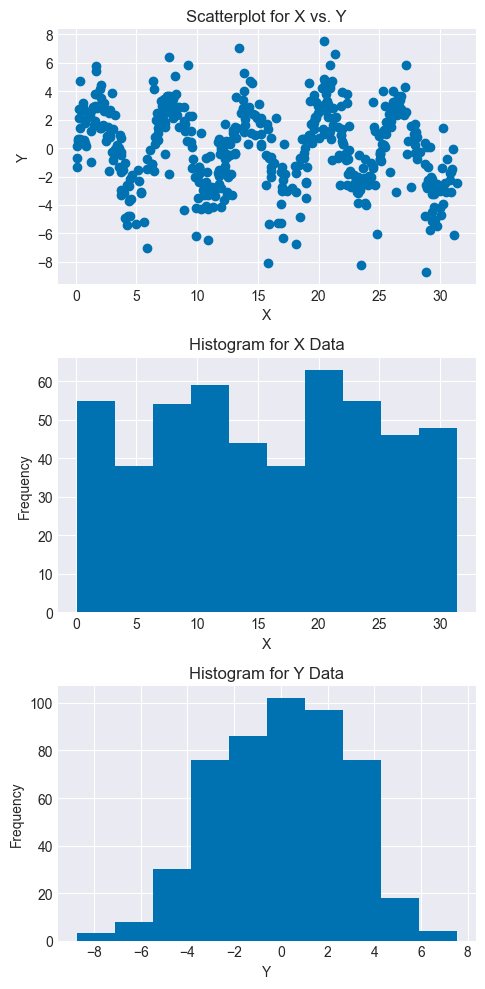

First 10 rows: 
 [[ 9.185  0.536]
 [29.323 -3.209]
 [26.767  2.751]
 [17.792 -2.81 ]
 [14.624  2.409]
 [ 8.078  3.677]
 [ 3.736 -3.28 ]
 [10.999 -2.997]
 [18.113 -3.055]
 [ 3.33  -0.443]]

-----------------------------------
Your results should look like this:
-----------------------------------
First 10 rows:
[[ 9.185  0.536]
 [29.323 -3.209]
 [26.767  2.751]
 [17.792 -2.81 ]
 [14.624  2.409]
 [ 8.078  3.677]
 [ 3.736 -3.28 ]
 [10.999 -2.997]
 [18.113 -3.055]
 [ 3.33  -0.443]]
-----------------------------------



In [95]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams["figure.figsize"] = [12,4.5]

# Your code here
data = np.genfromtxt('data/mystery_data_1.csv', delimiter = ',', skip_header = 1)
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(5, 10), tight_layout = True)
axes[0].scatter(data[:,0], data[:,1])
axes[0].set_title("Scatterplot for X vs. Y")
axes[0].set_xlabel("X")
axes[0].set_ylabel("Y")
axes[1].hist(data[:,0], bins = 10)
axes[1].set_title("Histogram for X Data")
axes[1].set_xlabel("X")
axes[1].set_ylabel("Frequency")
axes[2].hist(data[:,1], bins = 10)
axes[2].set_title("Histogram for Y Data")
axes[2].set_xlabel("Y")
axes[2].set_ylabel("Frequency")
plt.show()

print("First 10 rows: \n", data[1:11,:])

print('''
-----------------------------------
Your results should look like this:
-----------------------------------
First 10 rows:
[[ 9.185  0.536]
 [29.323 -3.209]
 [26.767  2.751]
 [17.792 -2.81 ]
 [14.624  2.409]
 [ 8.078  3.677]
 [ 3.736 -3.28 ]
 [10.999 -2.997]
 [18.113 -3.055]
 [ 3.33  -0.443]]
-----------------------------------
''')

## Task 2: Analyze Mystery Data 1

### 2a. Use scipy to calculate the linear regression for Mystery Data 1 

Print first 10 lines rows of data.

Calculate the linear regression [scipy.linalg.lstsq](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lstsq.html)
- The `a` parameter is the `A` array of independent data variables, the `b` parameter is the `y` array of the dependent variable values.
- Note that `A` matrix should include the column of 1s for the intercept. 
- Useful: [hstack](https://docs.scipy.org/doc/numpy/reference/generated/numpy.hstack.html), [ones](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html) and `np.newaxis` (or [reshape](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html)).

**NOTE:** One of the things that `scipy.linalg.lstsq` returns is the **residues**, which is another name for the sum of all the squared errors (**SSE**). This is different than the residuals, which refer to just the set of errors (i.e. differences between value on regression curve and actual data sample), not their sum of squares.

Print the least-squares solved coefficients and residues.

Using the SSE, calculate and print the $R^2$ value using the following equations:

$R^2 = 1 - \frac{SSE}{smd}$

The square mean deviation: $smd = \sum_i^N \left ( y_i - \frac{1}{N} \sum_i^N y_i \right )^2$

In [83]:
import scipy.linalg as scipy

# Your code here
data = np.genfromtxt('data/mystery_data_1.csv', delimiter = ',', skip_header = 1)
A = data[1:,0]
A = A[:, np.newaxis]
new_A = np.hstack((np.ones([A.shape[0],1]), A))
B = data[1:,1]
c, sse, _, _ = scipy.lstsq(new_A, B)
mean_B = np.mean(B)
smd = np.sum((B - mean_B)**2)
R_squared = 1 - (sse/smd)
print("c: ", c)
print("\nSSE: ", sse)
print("\nr2: ", R_squared)




print('''
-----------------------------------
Your results should look like this:
----------------------------------- 
c: [ 0.92884793 -0.05650709]

SSE: 3722.8001542015754

r2: 0.033824411486558126
-----------------------------------
''')

c:  [ 0.92884793 -0.05650709]

SSE:  3722.8001542015754

r2:  0.033824411486558126

-----------------------------------
Your results should look like this:
----------------------------------- 
c: [ 0.92884793 -0.05650709]

SSE: 3722.8001542015754

r2: 0.033824411486558126
-----------------------------------



### 2b. Visualize linear regression results with matplotlib

1. Plot a scatterplot of the mystery data X on the x axis and Y on the y axis
2. Plot a line representing the linear regression
    1. For line_x, use [linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html) to create 100 points from the min x value to the max x value
    2. For line_y, multiply line_x by the slope and add the intercept
3. Include a title (with $R^2$ value), legend, x label and y label

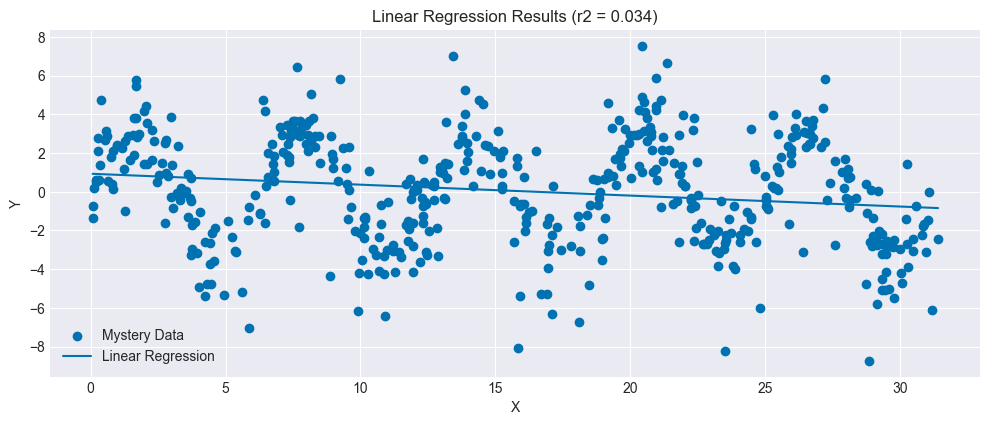

In [90]:
plt.scatter(A, B, label = 'Mystery Data')
xLine = np.linspace(np.min(A), np.max(A), 100)  # 100 values
yLine = c[0] + c[1]*xLine # c and x values (xLine)
plt.plot(xLine, yLine, label = 'Linear Regression')
plt.title("Linear Regression Results (r2 = 0.034)")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

### 2c.  Interpret the results of the linear regression of the dataset 

**Question 1:** Interpret the results based on your plot and $R^2$ value. Is the linear regression model a good model for the data? **Why?**

**Answer 1:** I do not think the linear regression model is a good model for the data because the data clearly needs to be represented by a quadratic line. The data seems to follow a quadratic trend throughout the scatterplot, and the linear regression is not capturing this data trend. This visualization explains the r2 value is so low (0.03). The closer the r2 value is to zero, the weaker or less helpful the linear regression model is. 